Let's try to implement a simple naive bayes classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
RND_SEED = 241096
np.random.seed(RND_SEED)

In [2]:
NB_MALES = 1000
MALES_MEAN_HEIGHT = 178.50 # cm
MALES_STD_HEIGHT = 11 # cm
MALES_MEAN_WEIGHT = 80 # kg
MALES_STD_WEIGHT = 13 # kg
MALES_MEAN_FOOT_SIZE = 28.5 # cm
MALES_STD_FOOT_SIZE = 2.4 # cm

Generate data (height, weight and foot size) on males.

In [3]:
males_height = np.random.normal(MALES_MEAN_HEIGHT, MALES_STD_HEIGHT, NB_MALES)
males_weight = np.random.normal(MALES_MEAN_WEIGHT, MALES_STD_WEIGHT, NB_MALES)
males_footsize = np.random.normal(MALES_MEAN_FOOT_SIZE, MALES_STD_FOOT_SIZE, NB_MALES)
X_males, y_males = np.column_stack((males_height, males_weight, males_footsize)), np.zeros(NB_MALES)

In [4]:
NB_FEMALES = 1000
FEMALES_MEAN_HEIGHT = 165.1 # cm
FEMALES_STD_HEIGHT = 6.35 # cm
FEMALES_MEAN_WEIGHT = 60.1 # kg
FEMALES_STD_WEIGHT = 10.4 # kg
FEMALES_MEAN_FOOT_SIZE = 19. # cm
FEMALES_STD_FOOT_SIZE = 2.27 # cm

Generate data (height, weight and foot size) on females.

In [5]:
females_height = np.random.normal(FEMALES_MEAN_HEIGHT, FEMALES_STD_HEIGHT, NB_FEMALES)
females_weight = np.random.normal(FEMALES_MEAN_WEIGHT, FEMALES_STD_WEIGHT, NB_FEMALES)
females_footsize = np.random.normal(FEMALES_MEAN_FOOT_SIZE, FEMALES_STD_FOOT_SIZE, NB_FEMALES)
X_females, y_females = np.column_stack([females_height, females_weight, females_footsize]), np.ones(NB_FEMALES)

Plot features for both genders.

<AxesSubplot:ylabel='Count'>

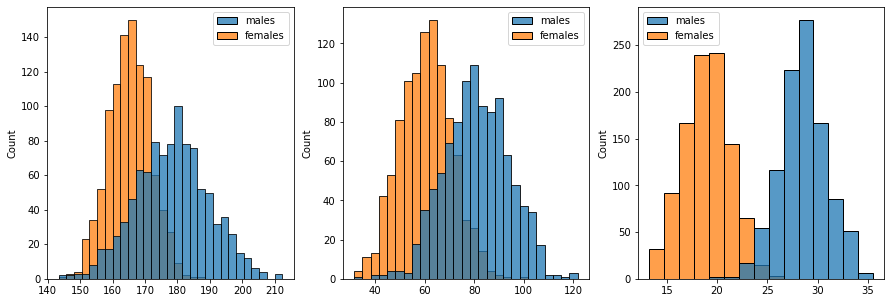

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot({'males':males_height, 'females':females_height})
plt.subplot(1,3,2)
sns.histplot({'males':males_weight, 'females':females_weight})
plt.subplot(1,3,3)
sns.histplot({'males':males_footsize, 'females':females_footsize})

In [9]:
X, y = np.concatenate([X_males, X_females]), np.concatenate([y_males, y_females])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND_SEED)

Instantiate a naive bayes classifier where features likelihood given a gender is maudeled using a gaussian. 

In [11]:
nbc = GaussianNB()

Fit the classifier

In [12]:
nbc.fit(X_train, y_train)

GaussianNB()

Score the classifier on using training data points.

In [13]:
nbc.score(X_train, y_train)

0.99

Score the classifier using test set

In [14]:
nbc.score(X_test, y_test)

0.9875

Print class priors, as expected P(male) = P(female) = 0.5

In [15]:
nbc.class_prior_

array([0.5025, 0.4975])

For each feature given a class print the mean (μ) of the corresponding normal distribution.

In [16]:
nbc.theta_

array([[178.41080202,  80.83553806,  28.61855661],
       [165.20225803,  60.53435096,  18.96931048]])

For each feature given a class print the standard deviation (σ) of the corresponding normal distribution.

In [15]:
np.sqrt(nbc.sigma_)

array([[11.33461887, 13.13309089,  2.34549968],
       [ 6.47824503, 10.5019695 ,  2.25783434]])